# *Tarea: Exercises on Vectors*
### Autor: Brahian Castro Devia

---

## 📌 *1. Insert and Erase*

### ✅ *Descripción*
Se requiere extender la implementación de un vector para incluir las operaciones insert(index, element) y erase(index). Estas funciones permiten insertar y eliminar elementos en posiciones específicas del vector.

```cpp
    void insert(const Type& elem, const unsigned int pos){
        assert(pos <= size_);
        if(size_ == capacity_){
            resize();
        }
        
        for(unsigned int i = size_; i > pos; i--){
            storage_[i] = storage_[i - 1];
        }
        
        storage_[pos] = elem;
        size_++;
    }
    
    void erase(const unsigned int pos){
        assert(pos < size_);
        for (unsigned int i = pos; i < size_; i++) {
            storage_[i] = storage_[i + 1];
        }
        size_--;
    }
```

### 📊 *Análisis de Complejidad*
- **Inserción (insert): En el peor caso, se requiere desplazar todos los elementos posteriores al índice dado, lo que tiene una complejidad de *O(n)*. Pero en el caso general sera un *O(n - pos)* siendo pos la posicion donde se ingresa el nuevo dato.
- **Eliminación (erase): Similar a la inserción, se deben mover los elementos después del índice eliminado, resultando en una complejidad de *O(n)* en el peor de los casos. Pero en su caso general sera tambien de *O(n - pos)* donde pos es la posicion del elemento a eliminar.


In [ ]:
%%writefile Estructura_hw1.cpp
#include <iostream>
#include <cassert>
#include <random>
#include <fstream>

using namespace std;

template <typename Type>   // Se incluye para manejar a Type como el tipo de dato que va a usar el Vector en sus elementos
                        // Y poder hacer que los vectores manejen cualquier tipo de dato
class Vector {
    private: // ATRIBUTOS
        Type *storage_;
        // Puntero al arreglo que manejaremos como Vector
        unsigned int capacity_;
        // Capacidad total actual del Vector
        unsigned int size_;
        // Tamaño actual del Vector
        unsigned int resizes_;

    public: // CONSTRUCTORES
        Vector(){
            capacity_ = 5; //Capacidad incial del Vector
            storage_ = new Type[capacity_];
            // new: reserva una posicion de memoria y devuelve su direccion
            size_ = 0; // cantidad de datos iniciales del Vector
            resizes_ = 0;
        }

		Vector(unsigned int tam, Type elem = Type()){
		    // Type elem = Type() - quiere decir que el elemento con el que vamos a llenar el Vector es del mismo tipo que el Vector
		    // Se llama el constructor de la clase del tipo de dato de type
            capacity_ = tam; //Capacidad incial del Vector
            storage_ = new Type[capacity_];
    		for(unsigned int i = 0; i < capacity_; i++){
				storage_[i] = elem;
			}
            size_ = capacity_; // cantidad de datos iniciales del Vector
            resizes_ = 0;
        }

        Vector(initializer_list<Type> list){
            capacity_ = list.size();  // La capacidad es el número de elementos en la lista
            storage_ = new Type[capacity_];
            size_ = list.size();
            unsigned int i = 0;
            for (const Type& elem : list) {
                storage_[i] = elem;  // Copiamos cada elemento al array
                i++;
            }
            resizes_ = 0;
        }

    private: // METODOS PRIVADOS
        void resize(){
            if(size_ == capacity_){
                // capacity_ += 1;     // Aumentamos la nueva capacidad del Vector: politica de Brahian
                // capacity_ += 2;     // Aumentamos la nueva capacidad del Vector: politica de
                capacity_ *= 1.5;   // Aumentamos la nueva capacidad del Vector: politica de Carlos
                // capacity_ *= 1.7;   // Aumentamos la nueva capacidad del Vector: politica de
                // capacity_ *= 2;     // Aumentamos la nueva capacidad del Vector: politica de Martin
                resizes_++;
            }
            Type *storage_2 = new Type[capacity_]; // Creamos un arreglo con la nueva capacidad

            for(unsigned int i = 0; i < size_; i++){
                storage_2[i] = storage_[i]; // Copiamos los datos del arreglo de menor al de mayor capacidad
            }

            delete [] storage_; // Liberamos la memoria que ocupaba el Vector anterior
            storage_ = storage_2; // Copiamos en el puntero originial la dir del nuevo arreglo mas grande
        }

    public: // METODOS PUBLICOS
        const Type& operator[](unsigned int pos) const { // El const despues de los () sirve para decir que la operacion no cambiara ninguno de los atributos de la class
            assert(pos >= 0 && pos < size_); // de la libreria <cassert>, recibe una expresion booleana
            return storage_[pos];
        }

        Type& at(const unsigned int pos) const { // UNFINISHED
            assert(pos >= 0 && pos < size_); // de la libreria <cassert>, recibe una expresion booleana
            return storage_[pos];
        }

        unsigned int size() const {
            return size_;
        }

        unsigned int capacity() const {
            return capacity_;
        }

        unsigned int resizes() const {
            return resizes_;
        }

        void print(){
            for(unsigned int i = 0; i < size(); i++) // Usamos el metodo size() dentro de la misma class
                cout << storage_[i] << " ";
            cout << endl;
        }

        void push_back(const Type &elem){
            if(size_ == capacity_){
                resize();
            }
            storage_[size_] = elem; // Ingresa un elemento al Vector, por la cola
            size_++; // Aumenta la cantidad de elementos en el Vector
        }

        void pop_back(){
            assert(size_);
            size_--; // Le quitamos uno a la variable que usamos como indice porque queremos dejar de usar el ultimo elemento como parte del Vector
        }

        void push_front(const Type& elem){
            if(size_ == capacity_){
                resize(); // Si necesiamos mas espacio para guardar todos los elementos del Vector aumentamos el tamaño del arreglo
            }
            for(int i = size_; i > 0; --i){
                storage_[i] = storage_[i - 1]; // Movemos todos los elementos del Vector uno a la der
            }
            storage_[0] = elem; // Insertamos el elemento deseado al principio
            size_++; // Aumentamos la cantidad de datos del Vector
        }

        void pop_front(){
            assert(size_);
            for(int i = 0; i < size_ - 1; ++i){
                storage_[i] = storage_[i + 1]; // Movemos todos los elementos del Vector uno hacia atras
            }
            size_--;
        }

        void insert(const Type& elem, const unsigned int pos){
            assert(pos <= size_);
            if(size_ == capacity_){
                resize();
            }

            for(unsigned int i = size_; i > pos; i--){
                storage_[i] = storage_[i - 1];
            }

            storage_[pos] = elem;
            size_++;
        }

        void erase(const unsigned int pos){
            assert(pos < size_);
            for (unsigned int i = pos; i < size_; i++) {
                storage_[i] = storage_[i + 1];
            }
            size_--;
        }

        int waste() const {
            return capacity_ - size_;
        }

        bool empty(){
            return !size_;
        }
};

template <typename Type>
class Stack{
    private:
        int top_;
        Vector<Type> storage_;

    public:
        Stack(const Type elem = Type()){
            top_ = 0;
            storage_.push_back(elem);
        }

        void push(const Type elem){
            top_++;
            storage_.push_back(elem);

        }

        Type pop(){
            assert(!empty());
            Type elem = storage_[top_];
            storage_.pop_back();
            top_--;
            return elem;
        }

        Type peek(){
            assert(!empty());
            return storage_[top_];
        }

        bool empty(){
            return top_ == -1;
        }

        void print(){
            cout << endl;
            for(int i = top_; i >= 0; i--)
                cout << storage_[i] << endl;
            cout << endl;
        }
};

template <typename Type>
void Merge(Vector<Type> *Vector, int left, int rigth, int middle) {
    int tamLeftVector = middle - left + 1;
    int tamRigthVector = rigth - middle;

    ::Vector<Type> leftVector(tamLeftVector);
    ::Vector<Type> rigthVector(tamRigthVector);

    for(int i = 0; i < tamLeftVector; i++) {
        leftVector.at(i) = Vector->at(left + i);
    }

    for(int j = 0; j < tamRigthVector; j++) {
        rigthVector.at(j) = Vector->at(middle + j + 1);
    }

    int l = 0, r = 0;
    int pos = left;

    while (l < tamLeftVector && r < tamRigthVector) {
        if (leftVector[l] <= rigthVector[r]) {
            Vector->at(pos) = leftVector[l];
            l++;
        } else {
            Vector->at(pos) = rigthVector[r];
            r++;
        }
        pos++;
    }

    while (l < tamLeftVector) {
        Vector->at(pos) = leftVector[l];
        l++;
        pos++;
    }

    while (r < tamRigthVector) {
        Vector->at(pos) = rigthVector[r];
        r++;
        pos++;
    }

    // ::Vector<Type>().swap(leftVector);
    // ::Vector<Type>().swap(rigthVector);
}

template <typename Type>
void MergeSort(Vector<Type> *Vector, int left, int rigth){
    if (left < rigth) {
        int middle = left + ((rigth - left) / 2);

        MergeSort(Vector, left, middle);

        MergeSort(Vector, middle + 1, rigth);

        Merge(Vector, left, rigth, middle);
    }
}

template <typename Type>
Vector<Type> removeDuplicates(Vector<Type>& vector){
    if(!vector.size()){
        return vector;
    }

    ::Vector<Type> newVector;

    for (unsigned int i = 0; i < vector.size(); i++) {
        bool flag = true;

        for(unsigned int j = 0; j < newVector.size(); j++){
            if(vector[i] == newVector[j]){
                flag = false;
                break;
            }
        }

        if(flag){
            newVector.push_back(vector[i]);
        }
    }
    return newVector;
}

template <typename Type>
Vector<Type> mergeSortedVectors(Vector<Type>& vector1, Vector<Type>& vector2){
    unsigned int size1 = vector1.size(), size2 = vector2.size();
    if(!size1){
        return vector2;
    } else if (!size2) {
        return vector1;
    } else if (!size1 && !size2) {
        return Vector<Type>();
    }

    Vector<Type> newVector;

    unsigned int i = 0, j = 0;

    for(; i < size1 || j < size2;){
        if(i < size1){
            newVector.push_back(vector1[i]);
            i++;
        } else if (j < size2){
            newVector.push_back(vector2[j]);
            j++;
        }
    }

    MergeSort(&newVector, 0, newVector.size() - 1);

    return newVector;
}

int main(){
    // prueba de insert and erase
    Vector<int> myVector;

    for (int i = 0; i < 10; i++){
        myVector.push_back(i * 10);
    }

    myVector.print();

    myVector.insert(55, 6);
    myVector.print();

    myVector.insert(1, 0);
    myVector.print();

    myVector.insert(100, 12);
    myVector.print();

    myVector.erase(8);
    myVector.print();

    return 0;
}


Writing Estructura_hw1.cpp


In [ ]:
!g++ Estructura_hw1.cpp -o Estructura_hw1
!./Estructura_hw1


0 10 20 30 40 50 60 70 80 90 
0 10 20 30 40 50 55 60 70 80 90 
1 0 10 20 30 40 50 55 60 70 80 90 
1 0 10 20 30 40 50 55 60 70 80 90 100 
1 0 10 20 30 40 50 55 70 80 90 100 


---

## 🔄 2. Removing Duplicates

### ✅ Descripción
Se debe implementar una función que elimine los elementos duplicados de un vector, manteniendo el orden original.

```cpp
template <typename Type>
Vector<Type> removeDuplicates(Vector<Type>& vector){
    if(!vector.size()){
        return vector;
    }
    
    ::Vector<Type> newVector;
    
    for (unsigned int i = 0; i < vector.size(); i++) {
        bool flag = true;
        
        for(unsigned int j = 0; j < newVector.size(); j++){
            if(vector[i] == newVector[j]){
                flag = false;
                break;
            }
        }
        
        if(flag){
            newVector.push_back(vector[i]);
        }
    }
    return newVector;
}
```

### 📊 Análisis de Complejidad
- *Usando un conjunto (unordered_set): La verificación de duplicados es *O(1) en promedio, y recorrer el vector es O(n), por lo que la complejidad total es *O(n). Alternativa sin estructuras adicionales: Comparando cada elemento con los anteriores, se obtiene una complejidad de *O(n²) al recorrer el vector original, por cada n hay que verificar si esa n ya se ingreso en el vector sin duplicados.

---


In [ ]:
%%writefile Estructura_hw1.cpp
#include <iostream>
#include <cassert>
#include <random>
#include <fstream>

using namespace std;

template <typename Type>   // Se incluye para manejar a Type como el tipo de dato que va a usar el Vector en sus elementos
                        // Y poder hacer que los vectores manejen cualquier tipo de dato
class Vector {
    private: // ATRIBUTOS
        Type *storage_;
        // Puntero al arreglo que manejaremos como Vector
        unsigned int capacity_;
        // Capacidad total actual del Vector
        unsigned int size_;
        // Tamaño actual del Vector
        unsigned int resizes_;

    public: // CONSTRUCTORES
        Vector(){
            capacity_ = 5; //Capacidad incial del Vector
            storage_ = new Type[capacity_];
            // new: reserva una posicion de memoria y devuelve su direccion
            size_ = 0; // cantidad de datos iniciales del Vector
            resizes_ = 0;
        }

		Vector(unsigned int tam, Type elem = Type()){
		    // Type elem = Type() - quiere decir que el elemento con el que vamos a llenar el Vector es del mismo tipo que el Vector
		    // Se llama el constructor de la clase del tipo de dato de type
            capacity_ = tam; //Capacidad incial del Vector
            storage_ = new Type[capacity_];
    		for(unsigned int i = 0; i < capacity_; i++){
				storage_[i] = elem;
			}
            size_ = capacity_; // cantidad de datos iniciales del Vector
            resizes_ = 0;
        }

        Vector(initializer_list<Type> list){
            capacity_ = list.size();  // La capacidad es el número de elementos en la lista
            storage_ = new Type[capacity_];
            size_ = list.size();
            unsigned int i = 0;
            for (const Type& elem : list) {
                storage_[i] = elem;  // Copiamos cada elemento al array
                i++;
            }
            resizes_ = 0;
        }

    private: // METODOS PRIVADOS
        void resize(){
            if(size_ == capacity_){
                // capacity_ += 1;     // Aumentamos la nueva capacidad del Vector: politica de Brahian
                // capacity_ += 2;     // Aumentamos la nueva capacidad del Vector: politica de
                capacity_ *= 1.5;   // Aumentamos la nueva capacidad del Vector: politica de Carlos
                // capacity_ *= 1.7;   // Aumentamos la nueva capacidad del Vector: politica de
                // capacity_ *= 2;     // Aumentamos la nueva capacidad del Vector: politica de Martin
                resizes_++;
            }
            Type *storage_2 = new Type[capacity_]; // Creamos un arreglo con la nueva capacidad

            for(unsigned int i = 0; i < size_; i++){
                storage_2[i] = storage_[i]; // Copiamos los datos del arreglo de menor al de mayor capacidad
            }

            delete [] storage_; // Liberamos la memoria que ocupaba el Vector anterior
            storage_ = storage_2; // Copiamos en el puntero originial la dir del nuevo arreglo mas grande
        }

    public: // METODOS PUBLICOS
        const Type& operator[](unsigned int pos) const { // El const despues de los () sirve para decir que la operacion no cambiara ninguno de los atributos de la class
            assert(pos >= 0 && pos < size_); // de la libreria <cassert>, recibe una expresion booleana
            return storage_[pos];
        }

        Type& at(const unsigned int pos) const { // UNFINISHED
            assert(pos >= 0 && pos < size_); // de la libreria <cassert>, recibe una expresion booleana
            return storage_[pos];
        }

        unsigned int size() const {
            return size_;
        }

        unsigned int capacity() const {
            return capacity_;
        }

        unsigned int resizes() const {
            return resizes_;
        }

        void print(){
            for(unsigned int i = 0; i < size(); i++) // Usamos el metodo size() dentro de la misma class
                cout << storage_[i] << " ";
            cout << endl;
        }

        void push_back(const Type &elem){
            if(size_ == capacity_){
                resize();
            }
            storage_[size_] = elem; // Ingresa un elemento al Vector, por la cola
            size_++; // Aumenta la cantidad de elementos en el Vector
        }

        void pop_back(){
            assert(size_);
            size_--; // Le quitamos uno a la variable que usamos como indice porque queremos dejar de usar el ultimo elemento como parte del Vector
        }

        void push_front(const Type& elem){
            if(size_ == capacity_){
                resize(); // Si necesiamos mas espacio para guardar todos los elementos del Vector aumentamos el tamaño del arreglo
            }
            for(int i = size_; i > 0; --i){
                storage_[i] = storage_[i - 1]; // Movemos todos los elementos del Vector uno a la der
            }
            storage_[0] = elem; // Insertamos el elemento deseado al principio
            size_++; // Aumentamos la cantidad de datos del Vector
        }

        void pop_front(){
            assert(size_);
            for(int i = 0; i < size_ - 1; ++i){
                storage_[i] = storage_[i + 1]; // Movemos todos los elementos del Vector uno hacia atras
            }
            size_--;
        }

        void insert(const Type& elem, const unsigned int pos){
            assert(pos <= size_);
            if(size_ == capacity_){
                resize();
            }

            for(unsigned int i = size_; i > pos; i--){
                storage_[i] = storage_[i - 1];
            }

            storage_[pos] = elem;
            size_++;
        }

        void erase(const unsigned int pos){
            assert(pos < size_);
            for (unsigned int i = pos; i < size_; i++) {
                storage_[i] = storage_[i + 1];
            }
            size_--;
        }

        int waste() const {
            return capacity_ - size_;
        }

        bool empty(){
            return !size_;
        }
};

template <typename Type>
class Stack{
    private:
        int top_;
        Vector<Type> storage_;

    public:
        Stack(const Type elem = Type()){
            top_ = 0;
            storage_.push_back(elem);
        }

        void push(const Type elem){
            top_++;
            storage_.push_back(elem);

        }

        Type pop(){
            assert(!empty());
            Type elem = storage_[top_];
            storage_.pop_back();
            top_--;
            return elem;
        }

        Type peek(){
            assert(!empty());
            return storage_[top_];
        }

        bool empty(){
            return top_ == -1;
        }

        void print(){
            cout << endl;
            for(int i = top_; i >= 0; i--)
                cout << storage_[i] << endl;
            cout << endl;
        }
};

template <typename Type>
void Merge(Vector<Type> *Vector, int left, int rigth, int middle) {
    int tamLeftVector = middle - left + 1;
    int tamRigthVector = rigth - middle;

    ::Vector<Type> leftVector(tamLeftVector);
    ::Vector<Type> rigthVector(tamRigthVector);

    for(int i = 0; i < tamLeftVector; i++) {
        leftVector.at(i) = Vector->at(left + i);
    }

    for(int j = 0; j < tamRigthVector; j++) {
        rigthVector.at(j) = Vector->at(middle + j + 1);
    }

    int l = 0, r = 0;
    int pos = left;

    while (l < tamLeftVector && r < tamRigthVector) {
        if (leftVector[l] <= rigthVector[r]) {
            Vector->at(pos) = leftVector[l];
            l++;
        } else {
            Vector->at(pos) = rigthVector[r];
            r++;
        }
        pos++;
    }

    while (l < tamLeftVector) {
        Vector->at(pos) = leftVector[l];
        l++;
        pos++;
    }

    while (r < tamRigthVector) {
        Vector->at(pos) = rigthVector[r];
        r++;
        pos++;
    }

    // ::Vector<Type>().swap(leftVector);
    // ::Vector<Type>().swap(rigthVector);
}

template <typename Type>
void MergeSort(Vector<Type> *Vector, int left, int rigth){
    if (left < rigth) {
        int middle = left + ((rigth - left) / 2);

        MergeSort(Vector, left, middle);

        MergeSort(Vector, middle + 1, rigth);

        Merge(Vector, left, rigth, middle);
    }
}

template <typename Type>
Vector<Type> removeDuplicates(Vector<Type>& vector){
    if(!vector.size()){
        return vector;
    }

    ::Vector<Type> newVector;

    for (unsigned int i = 0; i < vector.size(); i++) {
        bool flag = true;

        for(unsigned int j = 0; j < newVector.size(); j++){
            if(vector[i] == newVector[j]){
                flag = false;
                break;
            }
        }

        if(flag){
            newVector.push_back(vector[i]);
        }
    }
    return newVector;
}

template <typename Type>
Vector<Type> mergeSortedVectors(Vector<Type>& vector1, Vector<Type>& vector2){
    unsigned int size1 = vector1.size(), size2 = vector2.size();
    if(!size1){
        return vector2;
    } else if (!size2) {
        return vector1;
    } else if (!size1 && !size2) {
        return Vector<Type>();
    }

    Vector<Type> newVector;

    unsigned int i = 0, j = 0;

    for(; i < size1 || j < size2;){
        if(i < size1){
            newVector.push_back(vector1[i]);
            i++;
        } else if (j < size2){
            newVector.push_back(vector2[j]);
            j++;
        }
    }

    MergeSort(&newVector, 0, newVector.size() - 1);

    return newVector;
}

int main(){
    // prueba de removeDuplicates
    Vector<int> numbers = {1, 2, 2, 3, 4, 4, 5};
    Vector<int> uniqueNumbers = removeDuplicates(numbers);

    uniqueNumbers.print(); // Expected: {1, 2, 3, 4, 5}

    Vector<int> numbers2 = {1,1,1,1,1,1};
    Vector<int> uniqueNumbers2 = removeDuplicates(numbers2);
    uniqueNumbers2.print(); // Expected: {1}

    Vector<int> numbers3 = {};
    Vector<int> uniqueNumbers3 = removeDuplicates(numbers3);
    uniqueNumbers3.print(); // Expected: {}

    Vector<int> numbers4 = {1};
    Vector<int> uniqueNumbers4 = removeDuplicates(numbers4);
    uniqueNumbers4.print(); // Expected: {1}

    return 0;
}


Overwriting Estructura_hw1.cpp


In [ ]:
!g++ Estructura_hw1.cpp -o Estructura_hw1
!./Estructura_hw1

1 2 3 4 5 
1 

1 


## 📈 3. Dynamic Array Resizing Analysis

### ✅ Descripción
Se requiere analizar el crecimiento del tamaño y capacidad del vector a medida que se insertan elementos.

### 🔬 Experimento
- Insertar una gran cantidad de números aleatorios en el vector.
- Registrar tamaño y capacidad cada 1000 inserciones.
- Graficar la relación entre tamaño y capacidad considerando diferentes políticas de crecimiento.

### 📊 Políticas de Crecimiento Evaluadas
- +1: La capacidad aumenta en una unidad cada vez que se alcanza el límite.
- +2: La capacidad aumenta en dos unicades cada vez que llega al límite.
- +1.5x: La capacidad se multiplica por 1.5 cuando se llena.
- x2: La capacidad se duplica al alcanzar su límite.

```cpp
        void resize(){
            if(size_ == capacity_){
                // capacity_ += 1;     // Aumentamos la nueva capacidad del Vector: politica de Brahian
                // capacity_ += 2;     // Aumentamos la nueva capacidad del Vector: politica de [desconocido]
                capacity_ *= 1.5;   // Aumentamos la nueva capacidad del Vector: politica de Carlos
                // capacity_ *= 1.7;   // Aumentamos la nueva capacidad del Vector: politica por defecto general
                // capacity_ *= 2;     // Aumentamos la nueva capacidad del Vector: politica de Martin
                resizes_++;
            }
            Type *storage_2 = new Type[capacity_]; // Creamos un arreglo con la nueva capacidad

            for(unsigned int i = 0; i < size_; i++){
                storage_2[i] = storage_[i]; // Copiamos los datos del arreglo de menor al de mayor capacidad
            }

            delete [] storage_; // Liberamos la memoria que ocupaba el Vector anterior
            storage_ = storage_2; // Copiamos en el puntero originial la dir del nuevo arreglo mas grande            
        }
```

### 📊 Análisis
- Crecimiento +1: Ineficiente para grandes volúmenes de datos, ya que cada inserción adicional puede requerir una reasignación de memoria.
- Crecimiento +2: Casi igual de ineficiente que "+1", ya que cada inserción adicional puede requerir un traslado de la memoria a otro lugar repetidamente.
- Crecimiento x1.5: Compromiso entre eficiencia y uso de memoria.
- Crecimiento x2: Mayor eficiencia en inserciones masivas, pero con riesgo de sobreasignación de memoria.

Se espera que la política de duplicación (x2) tenga el mejor rendimiento en términos de velocidad y menos eficiente en espacio, mientras que la política de incremento lineal (+1) sea la menos eficiente en cuanto a el rendimiento debido a las frecuentes reasignaciones de memoria, aunque no derperdiciara memoria.

De esta manera se hara la toma de datos, guardando estos en un archivo con el nombre de "capacity_resize_" y la politica usada, cambiando en cada ejecucion del codigo, la politica de crecimiento del arreglo interno del vector.

```cpp
    // pruebas de arrays dinamicos
    random_device rd;
    mt19937 gen(rd());
    uniform_int_distribution<int> dist(1, 10000);

    ofstream data("capacity_resize_x1_5.dat", ios::app);
    Vector<int> vector;

    data << "Capacities\t" << "Resizes" << endl;
    for (int i = 0; i < 1000000; i++) {
        if(i % 1000 == 0){
            data << vector.capacity() << "\t\t" << vector.resizes() << endl;
            cout << vector.capacity() << "\t\t" << vector.resizes() << endl;
        }
        vector.push_back(dist(gen));
    }

```

---


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving capacity_resize_+1.dat to capacity_resize_+1 (1).dat
Saving capacity_resize_+2.dat to capacity_resize_+2 (1).dat
Saving capacity_resize_x1_5.dat to capacity_resize_x1_5 (1).dat
Saving capacity_resize_x2.dat to capacity_resize_x2 (1).dat


<Figure size 1000x600 with 0 Axes>

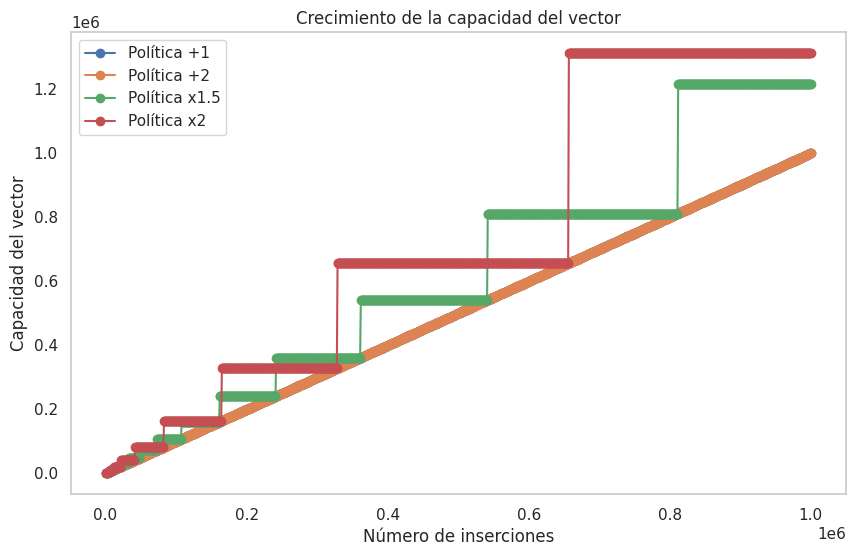

<Figure size 640x480 with 0 Axes>

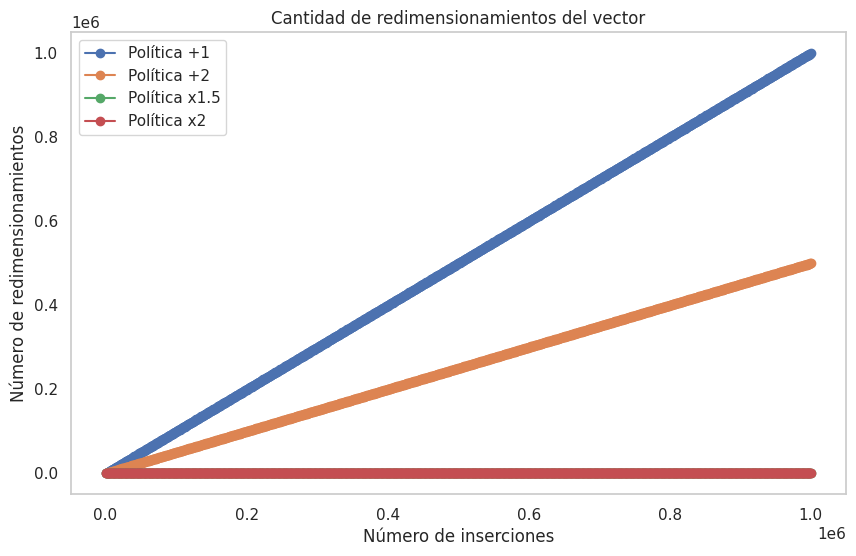

<Figure size 640x480 with 0 Axes>

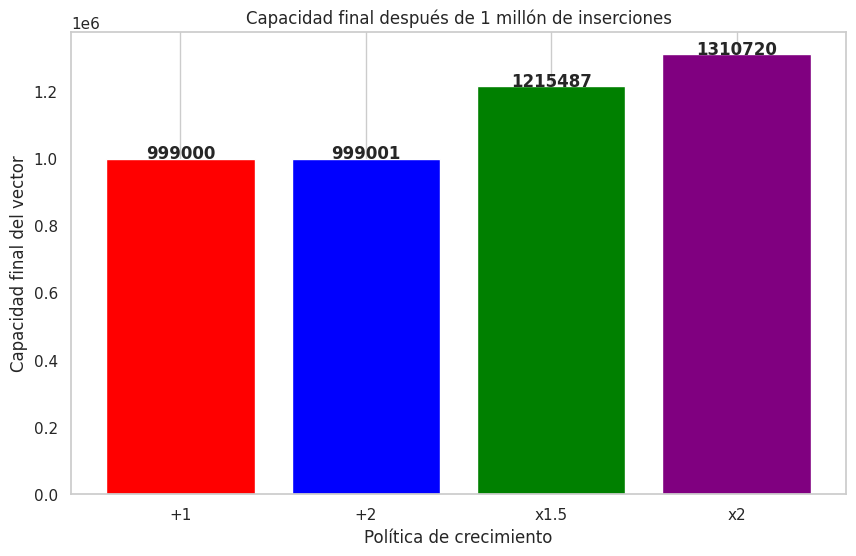

<Figure size 640x480 with 0 Axes>

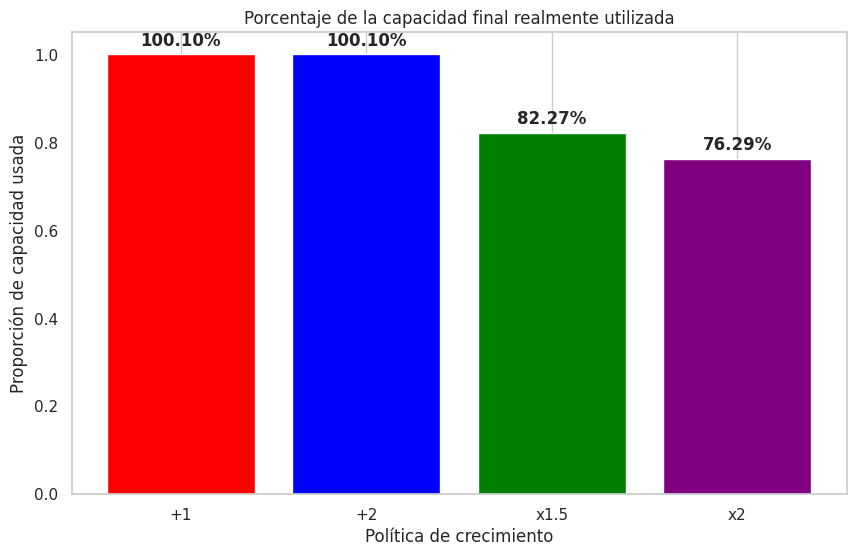

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Archivos de datos
files = {
     "+1": "/content/capacity_resize_+1.dat",
    "+2": "/content/capacity_resize_+2.dat",
    "x1.5": "/content/capacity_resize_x1_5.dat",
    "x2": "/content/capacity_resize_x2.dat"
}

# Leer y procesar los datos
data = {}
for policy, file_path in files.items():
    with open(file_path, "r") as f:
        lines = f.readlines()[1:]  # Omitir encabezado
        capacities, resizes = [], []

        for line in lines:
            parts = line.strip().split()
            if len(parts) == 2:  # Asegurar que haya dos valores por línea
                capacities.append(int(parts[0]))
                resizes.append(int(parts[1]))

        data[policy] = {
            "insertions": np.arange(1000, len(capacities) * 1000 + 1, 1000),
            "capacities": np.array(capacities),
            "resizes": np.array(resizes)
        }

# Crear figuras con más separación entre gráficos
plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)

# Graficar capacidad vs. inserciones
plt.figure(figsize=(10, 6))
for policy, values in data.items():
    plt.plot(values["insertions"], values["capacities"], marker='o', markersize=6, label=f"Política {policy}")

plt.xlabel("Número de inserciones")
plt.ylabel("Capacidad del vector")
plt.title("Crecimiento de la capacidad del vector")
plt.legend()
plt.grid()
plt.show()
plt.subplots_adjust(hspace=0.4)  # Espaciado entre gráficos

# Graficar número de resizes vs. inserciones
plt.figure(figsize=(10, 6))
for policy, values in data.items():
    plt.plot(values["insertions"], values["resizes"], marker='o', markersize=6, label=f"Política {policy}")

plt.xlabel("Número de inserciones")
plt.ylabel("Número de redimensionamientos")
plt.title("Cantidad de redimensionamientos del vector")
plt.legend()
plt.grid()
plt.show()
plt.subplots_adjust(hspace=0.4)

# Gráfico de capacidad final y uso real
final_capacities = [values["capacities"][-1] for values in data.values()]
used_space = [1000000 / final for final in final_capacities]  # Espacio usado en porcentaje

# Gráfica de capacidad final con valores exactos
plt.figure(figsize=(10, 6))
bars = plt.bar(data.keys(), final_capacities, color=['red', 'blue', 'green', 'purple'])

plt.xlabel("Política de crecimiento")
plt.ylabel("Capacidad final del vector")
plt.title("Capacidad final después de 1 millón de inserciones")
plt.grid(axis='y')

# Agregar etiquetas con los valores exactos en cada barra
for bar, capacity in zip(bars, final_capacities):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 500,  # Posición del texto
             str(capacity), ha='center', fontsize=12, fontweight='bold')

plt.show()
plt.subplots_adjust(hspace=0.4)

# Gráfica de porcentaje de capacidad usada
plt.figure(figsize=(10, 6))
bars = plt.bar(data.keys(), used_space, color=['red', 'blue', 'green', 'purple'])

plt.xlabel("Política de crecimiento")
plt.ylabel("Proporción de capacidad usada")
plt.title("Porcentaje de la capacidad final realmente utilizada")
plt.grid(axis='y')

# Agregar etiquetas con los valores exactos en cada barra
for bar, usage in zip(bars, used_space):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,  # Posición del texto
             f"{usage:.2%}", ha='center', fontsize=12, fontweight='bold')

plt.show()


---

## 🏗 4. Implementing a Stack Using a Vector

### ✅ Descripción
Se implementará una pila utilizando un vector. La pila debe admitir operaciones básicas como push, pop y peek.

```cpp
template <typename Type>
class Stack{
    private:
        int top_;
        Vector<Type> storage_;

    public:
        Stack(const Type elem = Type()){
            top_ = 0;
            storage_.push_back(elem);
        }

        void push(const Type elem){
            top_++;
            storage_.push_back(elem);

        }

        Type pop(){
            assert(!empty());
            Type elem = storage_[top_];
            storage_.pop_back();
            top_--;
            return elem;
        }
        
        Type peek(){
            assert(!empty());
            return storage_[top_];
        }
        
        bool empty(){
            return top_ == -1;
        }

        void print(){
            cout << endl;
            for(int i = top_; i >= 0; i--)
                cout << storage_[i] << endl;
            cout << endl;
        }
};

```

### 📊 Análisis de Complejidad
- *push(value)*: O(1) en promedio, salvo cuando se requiere redimensionar la capacidad del vector.
- *pop()*: O(1), ya que solo elimina el último elemento.
- *peek()*: O(1), ya que accede directamente al último elemento.

---


In [ ]:
%%writefile Estructura_hw1.cpp
#include <iostream>
#include <cassert>
#include <random>
#include <fstream>

using namespace std;

template <typename Type>   // Se incluye para manejar a Type como el tipo de dato que va a usar el Vector en sus elementos
                        // Y poder hacer que los vectores manejen cualquier tipo de dato
class Vector {
    private: // ATRIBUTOS
        Type *storage_;
        // Puntero al arreglo que manejaremos como Vector
        unsigned int capacity_;
        // Capacidad total actual del Vector
        unsigned int size_;
        // Tamaño actual del Vector
        unsigned int resizes_;

    public: // CONSTRUCTORES
        Vector(){
            capacity_ = 5; //Capacidad incial del Vector
            storage_ = new Type[capacity_];
            // new: reserva una posicion de memoria y devuelve su direccion
            size_ = 0; // cantidad de datos iniciales del Vector
            resizes_ = 0;
        }

		Vector(unsigned int tam, Type elem = Type()){
		    // Type elem = Type() - quiere decir que el elemento con el que vamos a llenar el Vector es del mismo tipo que el Vector
		    // Se llama el constructor de la clase del tipo de dato de type
            capacity_ = tam; //Capacidad incial del Vector
            storage_ = new Type[capacity_];
    		for(unsigned int i = 0; i < capacity_; i++){
				storage_[i] = elem;
			}
            size_ = capacity_; // cantidad de datos iniciales del Vector
            resizes_ = 0;
        }

        Vector(initializer_list<Type> list){
            capacity_ = list.size();  // La capacidad es el número de elementos en la lista
            storage_ = new Type[capacity_];
            size_ = list.size();
            unsigned int i = 0;
            for (const Type& elem : list) {
                storage_[i] = elem;  // Copiamos cada elemento al array
                i++;
            }
            resizes_ = 0;
        }

    private: // METODOS PRIVADOS
        void resize(){
            if(size_ == capacity_){
                // capacity_ += 1;     // Aumentamos la nueva capacidad del Vector: politica de Brahian
                // capacity_ += 2;     // Aumentamos la nueva capacidad del Vector: politica de
                capacity_ *= 1.5;   // Aumentamos la nueva capacidad del Vector: politica de Carlos
                // capacity_ *= 1.7;   // Aumentamos la nueva capacidad del Vector: politica de
                // capacity_ *= 2;     // Aumentamos la nueva capacidad del Vector: politica de Martin
                resizes_++;
            }
            Type *storage_2 = new Type[capacity_]; // Creamos un arreglo con la nueva capacidad

            for(unsigned int i = 0; i < size_; i++){
                storage_2[i] = storage_[i]; // Copiamos los datos del arreglo de menor al de mayor capacidad
            }

            delete [] storage_; // Liberamos la memoria que ocupaba el Vector anterior
            storage_ = storage_2; // Copiamos en el puntero originial la dir del nuevo arreglo mas grande
        }

    public: // METODOS PUBLICOS
        const Type& operator[](unsigned int pos) const { // El const despues de los () sirve para decir que la operacion no cambiara ninguno de los atributos de la class
            assert(pos >= 0 && pos < size_); // de la libreria <cassert>, recibe una expresion booleana
            return storage_[pos];
        }

        Type& at(const unsigned int pos) const { // UNFINISHED
            assert(pos >= 0 && pos < size_); // de la libreria <cassert>, recibe una expresion booleana
            return storage_[pos];
        }

        unsigned int size() const {
            return size_;
        }

        unsigned int capacity() const {
            return capacity_;
        }

        unsigned int resizes() const {
            return resizes_;
        }

        void print(){
            for(unsigned int i = 0; i < size(); i++) // Usamos el metodo size() dentro de la misma class
                cout << storage_[i] << " ";
            cout << endl;
        }

        void push_back(const Type &elem){
            if(size_ == capacity_){
                resize();
            }
            storage_[size_] = elem; // Ingresa un elemento al Vector, por la cola
            size_++; // Aumenta la cantidad de elementos en el Vector
        }

        void pop_back(){
            assert(size_);
            size_--; // Le quitamos uno a la variable que usamos como indice porque queremos dejar de usar el ultimo elemento como parte del Vector
        }

        void push_front(const Type& elem){
            if(size_ == capacity_){
                resize(); // Si necesiamos mas espacio para guardar todos los elementos del Vector aumentamos el tamaño del arreglo
            }
            for(int i = size_; i > 0; --i){
                storage_[i] = storage_[i - 1]; // Movemos todos los elementos del Vector uno a la der
            }
            storage_[0] = elem; // Insertamos el elemento deseado al principio
            size_++; // Aumentamos la cantidad de datos del Vector
        }

        void pop_front(){
            assert(size_);
            for(int i = 0; i < size_ - 1; ++i){
                storage_[i] = storage_[i + 1]; // Movemos todos los elementos del Vector uno hacia atras
            }
            size_--;
        }

        void insert(const Type& elem, const unsigned int pos){
            assert(pos <= size_);
            if(size_ == capacity_){
                resize();
            }

            for(unsigned int i = size_; i > pos; i--){
                storage_[i] = storage_[i - 1];
            }

            storage_[pos] = elem;
            size_++;
        }

        void erase(const unsigned int pos){
            assert(pos < size_);
            for (unsigned int i = pos; i < size_; i++) {
                storage_[i] = storage_[i + 1];
            }
            size_--;
        }

        int waste() const {
            return capacity_ - size_;
        }

        bool empty(){
            return !size_;
        }
};

template <typename Type>
class Stack{
    private:
        int top_;
        Vector<Type> storage_;

    public:
        Stack(const Type elem = Type()){
            top_ = 0;
            storage_.push_back(elem);
        }

        void push(const Type elem){
            top_++;
            storage_.push_back(elem);

        }

        Type pop(){
            assert(!empty());
            Type elem = storage_[top_];
            storage_.pop_back();
            top_--;
            return elem;
        }

        Type peek(){
            assert(!empty());
            return storage_[top_];
        }

        bool empty(){
            return top_ == -1;
        }

        void print(){
            cout << endl;
            for(int i = top_; i >= 0; i--)
                cout << storage_[i] << endl;
            cout << endl;
        }
};

template <typename Type>
void Merge(Vector<Type> *Vector, int left, int rigth, int middle) {
    int tamLeftVector = middle - left + 1;
    int tamRigthVector = rigth - middle;

    ::Vector<Type> leftVector(tamLeftVector);
    ::Vector<Type> rigthVector(tamRigthVector);

    for(int i = 0; i < tamLeftVector; i++) {
        leftVector.at(i) = Vector->at(left + i);
    }

    for(int j = 0; j < tamRigthVector; j++) {
        rigthVector.at(j) = Vector->at(middle + j + 1);
    }

    int l = 0, r = 0;
    int pos = left;

    while (l < tamLeftVector && r < tamRigthVector) {
        if (leftVector[l] <= rigthVector[r]) {
            Vector->at(pos) = leftVector[l];
            l++;
        } else {
            Vector->at(pos) = rigthVector[r];
            r++;
        }
        pos++;
    }

    while (l < tamLeftVector) {
        Vector->at(pos) = leftVector[l];
        l++;
        pos++;
    }

    while (r < tamRigthVector) {
        Vector->at(pos) = rigthVector[r];
        r++;
        pos++;
    }

    // ::Vector<Type>().swap(leftVector);
    // ::Vector<Type>().swap(rigthVector);
}

template <typename Type>
void MergeSort(Vector<Type> *Vector, int left, int rigth){
    if (left < rigth) {
        int middle = left + ((rigth - left) / 2);

        MergeSort(Vector, left, middle);

        MergeSort(Vector, middle + 1, rigth);

        Merge(Vector, left, rigth, middle);
    }
}

template <typename Type>
Vector<Type> removeDuplicates(Vector<Type>& vector){
    if(!vector.size()){
        return vector;
    }

    ::Vector<Type> newVector;

    for (unsigned int i = 0; i < vector.size(); i++) {
        bool flag = true;

        for(unsigned int j = 0; j < newVector.size(); j++){
            if(vector[i] == newVector[j]){
                flag = false;
                break;
            }
        }

        if(flag){
            newVector.push_back(vector[i]);
        }
    }
    return newVector;
}

template <typename Type>
Vector<Type> mergeSortedVectors(Vector<Type>& vector1, Vector<Type>& vector2){
    unsigned int size1 = vector1.size(), size2 = vector2.size();
    if(!size1){
        return vector2;
    } else if (!size2) {
        return vector1;
    } else if (!size1 && !size2) {
        return Vector<Type>();
    }

    Vector<Type> newVector;

    unsigned int i = 0, j = 0;

    for(; i < size1 || j < size2;){
        if(i < size1){
            newVector.push_back(vector1[i]);
            i++;
        } else if (j < size2){
            newVector.push_back(vector2[j]);
            j++;
        }
    }

    MergeSort(&newVector, 0, newVector.size() - 1);

    return newVector;
}

int main(){
    // prueba de implementacion de Stack
    Stack<int> pila(10);

    pila.print();
    pila.pop();
    cout << pila.empty() << endl;
    pila.push(20);
    pila.push(30);
    pila.print();
    cout << pila.peek() << endl;
    pila.push(40);
    cout << pila.peek() << endl;
    pila.pop();
    pila.print();
    pila.push(50);
    cout << pila.peek() << endl;
    pila.print();

    return 0;
}


Overwriting Estructura_hw1.cpp


In [ ]:
!g++ Estructura_hw1.cpp -o Estructura_hw1
!./Estructura_hw1


10

1

30
20

30
40

30
20

50

50
30
20



---

## 🔗 5. Merge Sorted Vectors

### ✅ Descripción
Se debe fusionar dos vectores ordenados en un solo vector ordenado.
```cpp
  template <typename Type>
void Merge(Vector<Type> *Vector, int left, int rigth, int middle) {
    int tamLeftVector = middle - left + 1;
    int tamRigthVector = rigth - middle;

    ::Vector<Type> leftVector(tamLeftVector);
    ::Vector<Type> rigthVector(tamRigthVector);

    for(int i = 0; i < tamLeftVector; i++) {
        leftVector.at(i) = Vector->at(left + i);
    }

    for(int j = 0; j < tamRigthVector; j++) {
        rigthVector.at(j) = Vector->at(middle + j + 1);
    }

    int l = 0, r = 0;
    int pos = left;

    while (l < tamLeftVector && r < tamRigthVector) {
        if (leftVector[l] <= rigthVector[r]) {
            Vector->at(pos) = leftVector[l];
            l++;
        } else {
            Vector->at(pos) = rigthVector[r];
            r++;
        }
        pos++;
    }

    while (l < tamLeftVector) {
        Vector->at(pos) = leftVector[l];
        l++;
        pos++;
    }

    while (r < tamRigthVector) {
        Vector->at(pos) = rigthVector[r];
        r++;
        pos++;
    }

    // ::Vector<Type>().swap(leftVector);
    // ::Vector<Type>().swap(rigthVector);
}

template <typename Type>
void MergeSort(Vector<Type> *Vector, int left, int rigth){
    if (left < rigth) {
        int middle = left + ((rigth - left) / 2);

        MergeSort(Vector, left, middle);

        MergeSort(Vector, middle + 1, rigth);

        Merge(Vector, left, rigth, middle);
    }
}

template <typename Type>
Vector<Type> mergeSortedVectors(Vector<Type>& vector1, Vector<Type>& vector2){
    unsigned int size1 = vector1.size(), size2 = vector2.size();
    if(!size1){
        return vector2;
    } else if (!size2) {
        return vector1;
    } else if (!size1 && !size2) {
        return Vector<Type>();
    }

    Vector<Type> newVector;

    unsigned int i = 0, j = 0;

    for(; i < size1 || j < size2;){
        if(i < size1){
            newVector.push_back(vector1[i]);
            i++;
        } else if (j < size2){
            newVector.push_back(vector2[j]);
            j++;
        }
    }

    MergeSort(&newVector, 0, newVector.size() - 1);

    return newVector;
}
```

### 📊 Análisis de Complejidad
El algoritmo de fusión compara los elementos de ambos vectores y los inserta en el nuevo vector, luego ordena este nuevo vector. La complejidad es *O( N + NlogN ), donde N es la suma de los tamaños de los vectores de entrada, ya que junta los dos vectores en uno solo, y luego ordena este ultimo.

---


In [ ]:
%%writefile Estructura_hw1.cpp
#include <iostream>
#include <cassert>
#include <random>
#include <fstream>

using namespace std;

template <typename Type>   // Se incluye para manejar a Type como el tipo de dato que va a usar el Vector en sus elementos
                        // Y poder hacer que los vectores manejen cualquier tipo de dato
class Vector {
    private: // ATRIBUTOS
        Type *storage_;
        // Puntero al arreglo que manejaremos como Vector
        unsigned int capacity_;
        // Capacidad total actual del Vector
        unsigned int size_;
        // Tamaño actual del Vector
        unsigned int resizes_;

    public: // CONSTRUCTORES
        Vector(){
            capacity_ = 5; //Capacidad incial del Vector
            storage_ = new Type[capacity_];
            // new: reserva una posicion de memoria y devuelve su direccion
            size_ = 0; // cantidad de datos iniciales del Vector
            resizes_ = 0;
        }

		Vector(unsigned int tam, Type elem = Type()){
		    // Type elem = Type() - quiere decir que el elemento con el que vamos a llenar el Vector es del mismo tipo que el Vector
		    // Se llama el constructor de la clase del tipo de dato de type
            capacity_ = tam; //Capacidad incial del Vector
            storage_ = new Type[capacity_];
    		for(unsigned int i = 0; i < capacity_; i++){
				storage_[i] = elem;
			}
            size_ = capacity_; // cantidad de datos iniciales del Vector
            resizes_ = 0;
        }

        Vector(initializer_list<Type> list){
            capacity_ = list.size();  // La capacidad es el número de elementos en la lista
            storage_ = new Type[capacity_];
            size_ = list.size();
            unsigned int i = 0;
            for (const Type& elem : list) {
                storage_[i] = elem;  // Copiamos cada elemento al array
                i++;
            }
            resizes_ = 0;
        }

    private: // METODOS PRIVADOS
        void resize(){
            if(size_ == capacity_){
                // capacity_ += 1;     // Aumentamos la nueva capacidad del Vector: politica de Brahian
                // capacity_ += 2;     // Aumentamos la nueva capacidad del Vector: politica de
                capacity_ *= 1.5;   // Aumentamos la nueva capacidad del Vector: politica de Carlos
                // capacity_ *= 1.7;   // Aumentamos la nueva capacidad del Vector: politica de
                // capacity_ *= 2;     // Aumentamos la nueva capacidad del Vector: politica de Martin
                resizes_++;
            }
            Type *storage_2 = new Type[capacity_]; // Creamos un arreglo con la nueva capacidad

            for(unsigned int i = 0; i < size_; i++){
                storage_2[i] = storage_[i]; // Copiamos los datos del arreglo de menor al de mayor capacidad
            }

            delete [] storage_; // Liberamos la memoria que ocupaba el Vector anterior
            storage_ = storage_2; // Copiamos en el puntero originial la dir del nuevo arreglo mas grande
        }

    public: // METODOS PUBLICOS
        const Type& operator[](unsigned int pos) const { // El const despues de los () sirve para decir que la operacion no cambiara ninguno de los atributos de la class
            assert(pos >= 0 && pos < size_); // de la libreria <cassert>, recibe una expresion booleana
            return storage_[pos];
        }

        Type& at(const unsigned int pos) const { // UNFINISHED
            assert(pos >= 0 && pos < size_); // de la libreria <cassert>, recibe una expresion booleana
            return storage_[pos];
        }

        unsigned int size() const {
            return size_;
        }

        unsigned int capacity() const {
            return capacity_;
        }

        unsigned int resizes() const {
            return resizes_;
        }

        void print(){
            for(unsigned int i = 0; i < size(); i++) // Usamos el metodo size() dentro de la misma class
                cout << storage_[i] << " ";
            cout << endl;
        }

        void push_back(const Type &elem){
            if(size_ == capacity_){
                resize();
            }
            storage_[size_] = elem; // Ingresa un elemento al Vector, por la cola
            size_++; // Aumenta la cantidad de elementos en el Vector
        }

        void pop_back(){
            assert(size_);
            size_--; // Le quitamos uno a la variable que usamos como indice porque queremos dejar de usar el ultimo elemento como parte del Vector
        }

        void push_front(const Type& elem){
            if(size_ == capacity_){
                resize(); // Si necesiamos mas espacio para guardar todos los elementos del Vector aumentamos el tamaño del arreglo
            }
            for(int i = size_; i > 0; --i){
                storage_[i] = storage_[i - 1]; // Movemos todos los elementos del Vector uno a la der
            }
            storage_[0] = elem; // Insertamos el elemento deseado al principio
            size_++; // Aumentamos la cantidad de datos del Vector
        }

        void pop_front(){
            assert(size_);
            for(int i = 0; i < size_ - 1; ++i){
                storage_[i] = storage_[i + 1]; // Movemos todos los elementos del Vector uno hacia atras
            }
            size_--;
        }

        void insert(const Type& elem, const unsigned int pos){
            assert(pos <= size_);
            if(size_ == capacity_){
                resize();
            }

            for(unsigned int i = size_; i > pos; i--){
                storage_[i] = storage_[i - 1];
            }

            storage_[pos] = elem;
            size_++;
        }

        void erase(const unsigned int pos){
            assert(pos < size_);
            for (unsigned int i = pos; i < size_; i++) {
                storage_[i] = storage_[i + 1];
            }
            size_--;
        }

        int waste() const {
            return capacity_ - size_;
        }

        bool empty(){
            return !size_;
        }
};

template <typename Type>
class Stack{
    private:
        int top_;
        Vector<Type> storage_;

    public:
        Stack(const Type elem = Type()){
            top_ = 0;
            storage_.push_back(elem);
        }

        void push(const Type elem){
            top_++;
            storage_.push_back(elem);

        }

        Type pop(){
            assert(!empty());
            Type elem = storage_[top_];
            storage_.pop_back();
            top_--;
            return elem;
        }

        Type peek(){
            assert(!empty());
            return storage_[top_];
        }

        bool empty(){
            return top_ == -1;
        }

        void print(){
            cout << endl;
            for(int i = top_; i >= 0; i--)
                cout << storage_[i] << endl;
            cout << endl;
        }
};

template <typename Type>
void Merge(Vector<Type> *Vector, int left, int rigth, int middle) {
    int tamLeftVector = middle - left + 1;
    int tamRigthVector = rigth - middle;

    ::Vector<Type> leftVector(tamLeftVector);
    ::Vector<Type> rigthVector(tamRigthVector);

    for(int i = 0; i < tamLeftVector; i++) {
        leftVector.at(i) = Vector->at(left + i);
    }

    for(int j = 0; j < tamRigthVector; j++) {
        rigthVector.at(j) = Vector->at(middle + j + 1);
    }

    int l = 0, r = 0;
    int pos = left;

    while (l < tamLeftVector && r < tamRigthVector) {
        if (leftVector[l] <= rigthVector[r]) {
            Vector->at(pos) = leftVector[l];
            l++;
        } else {
            Vector->at(pos) = rigthVector[r];
            r++;
        }
        pos++;
    }

    while (l < tamLeftVector) {
        Vector->at(pos) = leftVector[l];
        l++;
        pos++;
    }

    while (r < tamRigthVector) {
        Vector->at(pos) = rigthVector[r];
        r++;
        pos++;
    }

    // ::Vector<Type>().swap(leftVector);
    // ::Vector<Type>().swap(rigthVector);
}

template <typename Type>
void MergeSort(Vector<Type> *Vector, int left, int rigth){
    if (left < rigth) {
        int middle = left + ((rigth - left) / 2);

        MergeSort(Vector, left, middle);

        MergeSort(Vector, middle + 1, rigth);

        Merge(Vector, left, rigth, middle);
    }
}

template <typename Type>
Vector<Type> removeDuplicates(Vector<Type>& vector){
    if(!vector.size()){
        return vector;
    }

    ::Vector<Type> newVector;

    for (unsigned int i = 0; i < vector.size(); i++) {
        bool flag = true;

        for(unsigned int j = 0; j < newVector.size(); j++){
            if(vector[i] == newVector[j]){
                flag = false;
                break;
            }
        }

        if(flag){
            newVector.push_back(vector[i]);
        }
    }
    return newVector;
}

template <typename Type>
Vector<Type> mergeSortedVectors(Vector<Type>& vector1, Vector<Type>& vector2){
    unsigned int size1 = vector1.size(), size2 = vector2.size();
    if(!size1){
        return vector2;
    } else if (!size2) {
        return vector1;
    } else if (!size1 && !size2) {
        return Vector<Type>();
    }

    Vector<Type> newVector;

    unsigned int i = 0, j = 0;

    for(; i < size1 || j < size2;){
        if(i < size1){
            newVector.push_back(vector1[i]);
            i++;
        } else if (j < size2){
            newVector.push_back(vector2[j]);
            j++;
        }
    }

    MergeSort(&newVector, 0, newVector.size() - 1);

    return newVector;
}

int main(){
    // prueba de mergeSortVectors
    Vector<int> vector1 = {1, 3, 5};
    Vector<int> vector2 = {2, 4, 6};
    Vector<int> mergedVector = mergeSortedVectors(vector1, vector2);

    mergedVector.print(); // Expected: {1, 2, 3, 4, 5, 6}

    Vector<int> vector3 = {1, 2, 3};
    Vector<int> vector4 = {};
    Vector<int> mergedVector2 = mergeSortedVectors(vector3, vector4);
    mergedVector2.print(); // Expected: {1, 2, 3}

    Vector<int> vector5 = {};
    Vector<int> vector6 = {4,5,6};
    Vector<int> mergedVector3 = mergeSortedVectors(vector5, vector6);
    mergedVector3.print(); // Expected: {4, 5, 6}

    Vector<int> vector7 = {1,1,1,1};
    Vector<int> vector8 = {1,1,1,1};
    Vector<int> mergedVector4 = mergeSortedVectors(vector7, vector8);
    mergedVector4.print(); // Expected: {1,1,1,1,1,1,1,1}

    Vector<int> vector9 = {1, 1, 2, 4, 20, 9, 3, 5};
    Vector<int> vector10 = {2, 4, 6, 10, 2};
    Vector<int> mergedVector5 = mergeSortedVectors(vector9, vector10);
    mergedVector5.print(); // Expected: {1, 1, 2, 2, 2, 3, 4, 4, 5, 6, 9, 10, 20}

    return 0;
}


Overwriting Estructura_hw1.cpp


In [ ]:
!g++ Estructura_hw1.cpp -o Estructura_hw1
!./Estructura_hw1

1 2 3 4 5 6 
1 2 3 
4 5 6 
1 1 1 1 1 1 1 1 
1 1 2 2 2 3 4 4 5 6 9 10 20 
